# COVID-19 - Global Cases - EDA  and Forecasting

This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).

Data is sourced from https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data


* Visual Dashboard (desktop):
https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

* Visual Dashboard (mobile):
http://www.arcgis.com/apps/opsdashboard/index.html#/85320e2ea5424dfaaa75ae62e5c06e61

* Lancet Article:
An interactive web-based dashboard to track COVID-19 in real time

* Provided by Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE):
https://systems.jhu.edu/

* Data Sources:

    - World Health Organization (WHO): https://www.who.int/
    - DXY.cn. Pneumonia. 2020. http://3g.dxy.cn/newh5/view/pneumonia.
    - BNO News: https://bnonews.com/index.php/2020/02/the-latest-coronavirus-cases/
    - National Health Commission of the People’s Republic of China (NHC):
http://www.nhc.gov.cn/xcs/yqtb/list_gzbd.shtml
    - China CDC (CCDC): http://weekly.chinacdc.cn/news/TrackingtheEpidemic.htm
    - Hong Kong Department of Health: https://www.chp.gov.hk/en/features/102465.html
    - Macau Government: https://www.ssm.gov.mo/portal/
    - Taiwan CDC: https://sites.google.com/cdc.gov.tw/2019ncov/taiwan?authuser=0
    - US CDC: https://www.cdc.gov/coronavirus/2019-ncov/index.html
    - Government of Canada: https://www.canada.ca/en/public-health/services/diseases/coronavirus.html
    - Australia Government Department of Health: https://www.health.gov.au/news/coronavirus-update-at-a-glance
    - European Centre for Disease Prevention and Control (ECDC): https://www.ecdc.europa.eu/en/geographical-distribution-2019-ncov-cases
    - Ministry of Health Singapore (MOH): https://www.moh.gov.sg/covid-19
    - Italy Ministry of Health: http://www.salute.gov.it/nuovocoronavirus

    - Additional Information about the Visual Dashboard:
https://systems.jhu.edu/research/public-health/ncov/

Contact Us:

Email: jhusystems@gmail.com

Terms of Use:

This GitHub repo and its contents herein, including all data, mapping, and analysis, copyright 2020 Johns Hopkins University, all rights reserved, is provided to the public strictly for educational and academic research purposes. The Website relies upon publicly available data from multiple sources, that do not always agree. The Johns Hopkins University hereby disclaims any and all representations and warranties with respect to the Website, including accuracy, fitness for use, and merchantability. Reliance on the Website for medical guidance or use of the Website in commerce is strictly prohibited.

__For better viewing experience, I recommend to enable NBextensions as guided @__

https://github.com/lsunku/DataScience/tree/master/JupyterNotebook

# Steps invoved in this notebook

1. Import Python Libraries for data analysis and ML 
2. Local user defined functions
3. Sourcing the Data
4. Inspect and Clean the Data
5. Exploratory Data Analysis
6. Preparing the data for modelling(train-test split, rescaling etc)
7. Model evaluation for Advanced Regression Criteria
8. Linear Regression Model for World Wide Case Predictions
9. Linear Regression Model for Italy Predictions
10. Linear Regression Model for US Predictions
11. Linear Regression Model for Spain Predictions
12. Linear Regression Model for Germany Predictions
13. Linear Regression Model for India Predictions

__Notes:__ Currently, I have used only time_series_covid19_confirmed_global for the following analysis. When I get time, I shall enhance the same with additional files time_series_covid19_deaths_global, time_series_covid19_recovered_global and integrate with daily reports.

# __Import Python Functions__

In [284]:
# Local classes and Local flags

# Local Classes
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
# Debug flag for investigative purpose
DEBUG = 0

# Default random_state
rndm_stat = 42

In [285]:
# Python libraries for Data processing and analysis
import time as time
strt = time.time()
import pandas as pd
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
pd.options.mode.use_inf_as_na = True
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import glob
from matplotlib.pyplot import figure
import warnings
import math
import itertools
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
from math import sqrt
import re
from prettytable import PrettyTable

# ML Libraries
import statsmodels
import statsmodels.api as sm
import sklearn as sk
from sklearn.model_selection import train_test_split,GridSearchCV, KFold,RandomizedSearchCV,StratifiedKFold
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler,OrdinalEncoder,LabelEncoder,Normalizer,RobustScaler,PowerTransformer,PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
import xgboost
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor


# __Local User Defined Functions__

## Local functions for data overview and data cleaning

In [286]:
# local functions

# Function to read a file & Store it in Pandas
# read_file takes either csv or excel file as input and reuturns a pandas DF and
# also prints head, tail, description, info and shape of the DF
def read_file(l_fname,l_path,head=0):
    i = l_fname.split(".")
    f_path = l_path+'/'+l_fname
    print(f_path,i[0],i[1])
    if (i[1] == "xlsx"):
        l_df = pd.read_excel(f_path,header=head,encoding = "ISO-8859-1",infer_datetime_format=True)
    elif (i[1] == "csv"):
        l_df = pd.read_csv(f_path,header=head,encoding = "ISO-8859-1",infer_datetime_format=True)
    ov_df(l_df)
    return(l_df)

# Function to get the Overview of DataFrame
# take df as input and prints head, tail, description, info and shape of the DF
def ov_df(l_df):
    print(color.BOLD+color.PURPLE + 'Inspect and Explore the Dataset' + color.END)
    print("\n#####################  DataFrame Head  ######################")
    print(l_df.head(3))
    print("\n#####################  DataFrame Tail  ######################")
    print(l_df.tail(3))
    print("\n#####################  DataFrame Info  ######################")
    print(l_df.info())
    print("\n####################  DataFrame Columns  ####################")
    print(list(l_df.columns))
    print("\n####################  DataFrame Shape  ####################")
    print("No of Rows",l_df.shape[0])
    print("No of Columns",l_df.shape[1])

# Function per_col_null takes a df as input and prints summary of Null Values across Columns
def per_col_null(l_df):
    print("\n############  Missing Values of Columns in %  ############")
    col_null = round((l_df.isnull().sum().sort_values(ascending=False)/len(l_df))*100,4)
    print(col_null[col_null > 0])  


# __Sourcing the Data__

## Read the train.csv

In [287]:
# Set the path and file name
folder=r"C:\My Folders\OneDrive\Surface\Sadguru\Lakshmi\Study\IIIB_PGDS\Hackathon\COVID_19\COVID-19\csse_covid_19_data\csse_covid_19_time_series"
file="time_series_covid19_confirmed_global.csv"

# Read file using local functions. read_file takes either csv or excel file as input and reuturns a pandas DF and
# also prints head, tail, description, info and shape of the DF
raw_df = read_file(file,folder)

C:\My Folders\OneDrive\Surface\Sadguru\Lakshmi\Study\IIIB_PGDS\Hackathon\COVID_19\COVID-19\csse_covid_19_data\csse_covid_19_time_series/time_series_covid19_confirmed_global.csv time_series_covid19_confirmed_global csv
Inspect and Explore the Dataset

#####################  DataFrame Head  ######################
  Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   

   1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  \
0        0        0        0        0        0        0        0       0   
1        0        0        0        0        0        0        0       0   
2        0        0        0        0        0        0        0       0   

   2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/

In [288]:
# transpose and format the columns
raw_df = raw_df.drop(["Province/State","Lat","Long"],axis=1).set_index("Country/Region").T.reset_index().rename(columns={'index':'Date'}).rename_axis("",axis="columns")

In [289]:
ov_df(raw_df)

Inspect and Explore the Dataset

#####################  DataFrame Head  ######################
      Date  Afghanistan  Albania  Algeria  Andorra  Angola  \
0  1/22/20            0        0        0        0       0   
1  1/23/20            0        0        0        0       0   
2  1/24/20            0        0        0        0       0   

   Antigua and Barbuda  Argentina  Armenia  Australia  Australia  Australia  \
0                    0          0        0          0          0          0   
1                    0          0        0          0          0          0   
2                    0          0        0          0          0          0   

   Australia  Australia  Australia  Australia  Australia  Austria  Azerbaijan  \
0          0          0          0          0          0        0           0   
1          0          0          0          0          0        0           0   
2          0          0          0          0          0        0           0   

   Bahamas  Ba

## Inspect the Column Data Types of c_df

In [290]:
# Analyze Categorical, Numerical and Date variables of Application Data
print(color.BOLD+"Categorical and Numerical Variables"+ color.END)
display(raw_df.dtypes.value_counts())
print(color.BOLD+"Numerical Integer Variables"+ color.END)
display(raw_df.select_dtypes(include='int64').dtypes)
print(color.BOLD+"Categorical Variables"+ color.END)
display(raw_df.select_dtypes(include=object).dtypes)
print(color.BOLD+"Numerical Float Variables"+ color.END)
display(raw_df.select_dtypes(include='float64').dtypes)

Categorical and Numerical Variables


int64     245
object      1
dtype: int64

Numerical Integer Variables



Afghanistan              int64
Albania                  int64
Algeria                  int64
Andorra                  int64
Angola                   int64
                         ...  
Libya                    int64
West Bank and Gaza       int64
Guinea-Bissau            int64
Mali                     int64
Saint Kitts and Nevis    int64
Length: 245, dtype: object

Categorical Variables



Date    object
dtype: object

Numerical Float Variables


Series([], dtype: object)

In [291]:
# Change the Date format
raw_df["Date"] = pd.to_datetime(raw_df["Date"],infer_datetime_format=True)

In [292]:
# as the given data is segrated in some countries which are epicenters and for some, it is not. To make it uniform, I sum up the data across countries

dt = raw_df.pop("Date")
dt.head()


0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
Name: Date, dtype: datetime64[ns]

In [293]:
# Aggregate the data across columns as there are columns with same column name
c_df = raw_df.groupby(by=raw_df.columns,axis=1).agg(sum)

c_df.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Cuba,Cyprus,Czechia,Denmark,Diamond Princess,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,"Korea, South",Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Mozambique,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3,0,7,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0
4,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,4,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0


In [294]:
c_df.insert(0,"Date",dt)
c_df.head()

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Cuba,Cyprus,Czechia,Denmark,Diamond Princess,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,"Korea, South",Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Mozambique,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
0,2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3,0,7,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,4,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0


# __Exploratory Data Analysis__

## Inspect the Null Values in c_df

In [295]:
# Null values in the Application DF. 
# per_col_null is local function which returns the % of null columns which are non zero
per_col_null(c_df)


############  Missing Values of Columns in %  ############
Series([], dtype: float64)


## Derived Columns

In [296]:
c_df["WW"] = c_df.sum(axis=1)

c_df.head()

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Cuba,Cyprus,Czechia,Denmark,Diamond Princess,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,"Korea, South",Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Mozambique,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe,WW
0,2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,555
1,2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,654
2,2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,941
3,2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3,0,7,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,1434
4,2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,4,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,2118


In [297]:
import plotly.express as ply
import plotly.graph_objects as go
import cufflinks as cf

In [298]:
cntry_li = list(c_df.columns)
cntry_li.remove("Date")

In [299]:
fig = go.Figure()
for i in cntry_li:
    fig.add_trace(go.Scatter(x=c_df["Date"],y=c_df[i],mode='lines+markers',name=i))
fig.update_layout(
    margin=dict(l=30, r=20, t=25, b=25),

)  
#fig.update_layout(yaxis_type="log")
fig.show()

## List of countries which are contributing to high number of positive cases

In [300]:
hi_co_li = [i for i,j in (c_df[cntry_li].iloc[-1] > 1500).items() if j == True]
print(hi_co_li)

['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'China', 'Czechia', 'Denmark', 'France', 'Germany', 'Iran', 'Ireland', 'Israel', 'Italy', 'Korea, South', 'Malaysia', 'Netherlands', 'Norway', 'Portugal', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'US', 'United Kingdom', 'WW']


In [301]:
fig = go.Figure()
for i in hi_co_li:
    fig.add_trace(go.Scatter(x=c_df["Date"],y=c_df[i],mode='lines+markers',name=i))
fig.update_layout(
    margin=dict(l=40, r=30, t=25, b=25),

)  
#fig.update_layout(yaxis_type="log")
fig.show()

## Analyze Categorical Columns of the c_df

In [302]:
c_df.insert(0,"Day",np.arange(1,len(c_df)+1))

In [303]:
c_df.head()

,Day,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Cuba,Cyprus,Czechia,Denmark,Diamond Princess,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,"Korea, South",Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Mozambique,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe,WW
0,1,2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,555
1,2,2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,654
2,3,2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,941
3,4,2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3,0,7,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,1434
4,5,2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,4,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,2118


In [304]:
# Create a list of numerical and categorical variables for future analysis
c_num_li = list(c_df.select_dtypes(include=np.number).columns)
c_cat_li = list(c_df.select_dtypes(exclude=np.number).columns)
print(color.BOLD+"\nNumerical Columns -"+color.END,c_num_li)
print(color.BOLD+"\nCategorical Columns -"+color.END,c_cat_li)


Numerical Columns - ['Day', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'I

## Analyze Numerical Columns of the c_df

In [305]:
# Inspect the Categorical columns
c_df[c_cat_li].head()

,Date
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [306]:
# Inspect the Numerical columns
c_df[c_num_li].head()

,Day,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Cuba,Cyprus,Czechia,Denmark,Diamond Princess,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,"Korea, South",Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Mozambique,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe,WW
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,555
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,654
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,941
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3,0,7,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,1434
4,5,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,4,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,2118


## Univariate analysis

Univariate analysis is performed only on specific countries which are suffering with high number of positive cases

### Univariate analysis of Countries which are sufferring with high number of corona cases

In [307]:
# Inspect list of categorical variables
print(hi_co_li) 

['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'China', 'Czechia', 'Denmark', 'France', 'Germany', 'Iran', 'Ireland', 'Israel', 'Italy', 'Korea, South', 'Malaysia', 'Netherlands', 'Norway', 'Portugal', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'US', 'United Kingdom', 'WW']


In [308]:
# Function to plot 2 or more line plots or time series plots
# line_pltly takes a df, dependent variable and variable list of columns
# to plot multiple reg plots
def line_pltly (l_df,l_dep,*args):
    for i in args:
        fig = go.Figure()
        for l in ["WW","China","Korea, South"]:
            fig.add_trace(go.Scatter(x=l_df[l_dep],y=l_df[l],mode='lines+markers',name=l))
        fig.add_trace(go.Scatter(x=l_df[l_dep],y=l_df[i],mode='lines+markers',name=i))
        fig.update_layout(width=800,height=400,hovermode="closest",clickmode="event+select")
        fig.show()

In [309]:
# dist_plt is local function which takes a df, rows, columns of subplot and name of columns as an argument and 
# plots distribution plots
# Part-1
line_pltly(c_df,"Day",*hi_co_li[0:4])

In [310]:
# dist_plt is local function which takes a df, rows, columns of subplot and name of columns as an argument and 
# plots distribution plots
# Part-1
line_pltly(c_df,"Day",*hi_co_li[4:8])

In [311]:
# dist_plt is local function which takes a df, rows, columns of subplot and name of columns as an argument and 
# plots distribution plots
# Part-1
line_pltly(c_df,"Day",*hi_co_li[8:12])

In [312]:
# dist_plt is local function which takes a df, rows, columns of subplot and name of columns as an argument and 
# plots distribution plots
# Part-1
line_pltly(c_df,"Day",*hi_co_li[12:16])

In [313]:
# dist_plt is local function which takes a df, rows, columns of subplot and name of columns as an argument and 
# plots distribution plots
# Part-1
line_pltly(c_df,"Day",*hi_co_li[16:20])

In [314]:
# dist_plt is local function which takes a df, rows, columns of subplot and name of columns as an argument and 
# plots distribution plots
# Part-1
line_pltly(c_df,"Day",*hi_co_li[20:24])

## Preparing the data for modelling(encoding,train-test split, rescaling etc)

In [315]:
# split the data for training and testing
df_train,df_test = train_test_split(c_df,train_size=0.93,random_state=rndm_stat,shuffle=False)
print(df_train.shape)
print(df_test.shape)

(59, 177)
(5, 177)


In [316]:
# Extract the serial number and store it for future purposes
trn_date = df_train.pop('Date')
tst_date = df_test.pop('Date')

In [317]:
print(df_train.head())
print(df_test.head())

   Day  Afghanistan  Albania  Algeria  Andorra  Angola  Antigua and Barbuda  \
0    1            0        0        0        0       0                    0   
1    2            0        0        0        0       0                    0   
2    3            0        0        0        0       0                    0   
3    4            0        0        0        0       0                    0   
4    5            0        0        0        0       0                    0   

   Argentina  Armenia  Australia  Austria  Azerbaijan  Bahamas  Bahrain  \
0          0        0          0        0           0        0        0   
1          0        0          0        0           0        0        0   
2          0        0          0        0           0        0        0   
3          0        0          0        0           0        0        0   
4          0        0          4        0           0        0        0   

   Bangladesh  Barbados  Belarus  Belgium  Belize  Benin  Bhutan  Bolivia 

#### Scaling of Test Data LR Model 1 and Model 2 using Standardization

# __Model Evaluation Criteria__

### Model Evaluation Criteria

Following criteria should be fulfilled for the best model and each model is evaluated based on the following conditions.
1. Residuals (Actual Test data and Predicted Test data) should be normally distributed with mean zero.
2. Residuals (Actual Test data and Predicted Test data) are independent of each other.
3. Residuals (Actual Test data and Predicted Test data)  have constant variance.
4. Model should not be overfit.
5. Adjusted R-Square should be little less but comapritively closer to R-Square.
6. R-Square should be comparitvely high suggesting a good fit.
7. R-Square of Test and Train should be closer to each other suggesting that model has worked well with unseen data.
8. Check the RMSE, MSE and MAE of each model and compare it among the 3 models.

# __LR Model using Linear Regression for World Wide Cases__

__Ridge Regression Steps__
* 1) Prepare the data for modelling
* 2) Hyperparameter tuning and selection using GridSearchCV
* 3) Build the Ridge Regression Model using optimal Lambda value
* 4) Predict on Train Set
* 5) Predict on Test Set

## Prepare the data for Modelling

In [318]:
# Prepare the strings to be used
cntry = "WW"
cntry_act = cntry+"_Actuals"
cntry_pred_m1 = cntry+"_Pred_M1"
cntry_pred_m2 = cntry+"_Pred_M2"

In [319]:
# 2 Models are created and hence 2 copies of df_train and test to perform the analysis
y_train = df_train[cntry].copy(deep=True)
X_train = df_train[["Day"]].copy(deep=True)

y_test = df_test[cntry].copy(deep=True)
X_test = df_test[["Day"]].copy(deep=True)

In [320]:
# Target variable is removed from predictor variables
display(y_train.head())
display(X_train.head())

0     555
1     654
2     941
3    1434
4    2118
Name: WW, dtype: int64

,Day
0,1
1,2
2,3
3,4
4,5


## Build the LR Model on Training Set

### Parameter Tuning and Selection of Degree

In [321]:
# function to populate linear regression model metrics
def lm_metrics(y_act,y_pred):
    # calculate the RSquared and RMSE for test data and Predicted data
    rsqr = r2_score(y_true=y_act,y_pred=y_pred)
    mar = mean_absolute_error(y_true=y_act,y_pred=y_pred)
    mse = mean_squared_error(y_act, y_pred)
    rmse = sqrt(mean_squared_error(y_act, y_pred))
    return (rsqr,mar,mse,rmse)

In [322]:
# function to populate evaluation metrics for different degree
def eval_reg (X_trn,y_trn,deg):
    # list of degrees to tune
    deg_li = list(np.arange(2,deg))
    metric_cols = ["Degree","RSquare","MAE","MSE","RMSE"]
    lm_metrics_df = pd.DataFrame(columns = metric_cols)
    
    # regression model
    reg = Lasso(random_state=rndm_stat)
    
    for count, degree in enumerate(deg_li):
        lm = make_pipeline(PolynomialFeatures(degree=degree), reg)
        lm.fit(X_trn, y_trn)
        y_trn_pred = lm.predict(X_trn)
        rsqr,mar,mse,rmse = lm_metrics(y_trn,y_trn_pred)
        lm_metrics_df.loc[count] = [degree,rsqr,mar,mse,rmse]
    display(lm_metrics_df)

In [323]:
# Populate the results for different degrees
deg = 12
eval_reg(X_train,y_train,12)

,Degree,RSquare,MAE,MSE,RMSE
0,2.0,0.916590,13480.196652,3.132974e+08,17700.209246
1,3.0,0.959918,10202.956552,1.505512e+08,12269.930631
2,4.0,0.972534,8771.283605,1.031646e+08,10156.997909
3,5.0,0.984023,6611.371366,6.001266e+07,7746.783723
4,6.0,0.991647,4606.091733,3.137572e+07,5601.403542
5,7.0,0.995024,3372.250737,1.869020e+07,4323.216464
6,8.0,0.995926,3129.934925,1.530076e+07,3911.619184
7,9.0,0.995900,3199.346412,1.539914e+07,3924.173673
8,10.0,0.995663,3283.265315,1.628899e+07,4035.961661
9,11.0,0.995449,3358.994661,1.709536e+07,4134.653368


### Build the Model using the selected degree

In [324]:
# Build the model with optimal degree.
degree = 8

reg = Lasso(random_state=rndm_stat)
# create an instance using the optimal degree
lm = make_pipeline(PolynomialFeatures(degree), reg)

# fit the model using training data
lm.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=8, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=42, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

## Predictions on the train set

In [325]:
# predict using train data
y_train_pred = lm.predict(X_train)

### Residual Analysis and validating the assumptions on Train Set

#### Error terms are normally distributed with mean zero

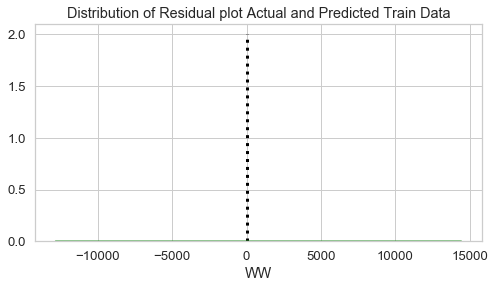

In [326]:
# Calculate the Residuals and check if they are normally distributed or not
res_m1 = y_train - y_train_pred
plt.figure(1,figsize=(8,4))
sns.set(style="whitegrid",font_scale=1.2)
sns.distplot(round(res_m1,2),bins=8,color="green")
plt.vlines(round(res_m1,2).mean(),ymin=0,ymax=2,linewidth=3.0,color="black",linestyles='dotted')
plt.title('Distribution of Residual plot Actual and Predicted Train Data')
plt.show()

In [327]:
# Mean of Residuals
round(res_m1,2).mean()

0.0006779661016172228

* The mean of residuals is observed to be very close 0

#### Error terms are independent of each other:

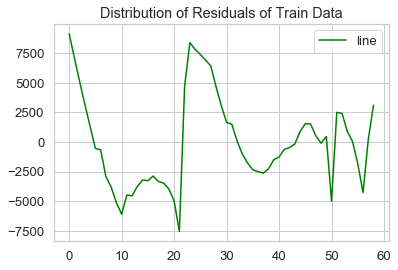

In [328]:
# check if the Residuals are normally distributed or not
plt.figure(1,figsize=(6,4))
sns.set(style="whitegrid",font_scale=1.2)
ax = sns.lineplot(data=res_m1, color="green", label="line")
plt.title('Distribution of Residuals of Train Data')
plt.show()

* There is no specific visible pattern

#### Error terms have constant variance (homoscedasticity):

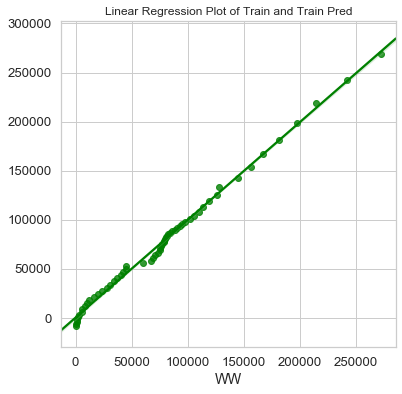

In [329]:
plt.figure(2,figsize=(6,6))
sns.set(style="whitegrid",font_scale=1.2)
ax1 = sns.regplot(x=y_train,y=y_train_pred,color='green')
plt.title('Linear Regression Plot of Train and Train Pred',fontsize=12)
plt.show()

* Error terms have constant variance but in the end couple of points are out of the variance

In [330]:
# calculate the RSquared and RMSE for test data and Predicted data
print(color.BOLD+"\nModel Evalutation metrics of train set with degree ",degree)
rsqr,mar,mse,rmse = lm_metrics(y_train,y_train_pred)

print(color.BOLD+"RSquare of the Model is ",round(rsqr,2))
print(color.BOLD+"Mean Absolute Error of the Model is",round(mar,2))
print(color.BOLD+"MSE of the model is ",round(mse,2))
print(color.BOLD+"RMSE of the model is ",round(rmse,2))


Model Evalutation metrics of train set with degree  8
RSquare of the Model is  1.0
Mean Absolute Error of the Model is 3129.93
MSE of the model is  15300764.64
RMSE of the model is  3911.62


### __Observations on Training Set__
1. Residuals (Actual Train data and Predicted Train data) are be normally distributed with mean zero.
   - Here it is close to 0
2. Residuals (Actual Train data and Predicted Train data) are independent of each other.
3. Residuals (Actual Train data and Predicted Train data)  have constant variance.
4. Adjusted R-Square and R-Square are close to each other and Adjusted R-Square is below R-Square.
___Hence the basic checks are good on training data, this model can be used on test set for further evaluations___

## Prediction and Evaluation on the Test Set

* Make predictions on the test set (y_test_pred)
* evaluate the model, r-squared on the test set

### Preprocessing of Test Set Data based on Train Set

In [331]:
display(y_test.head())
display(X_test.head())

59    304396
60    336953
61    378235
62    418045
63    467593
Name: WW, dtype: int64

,Day
59,60
60,61
61,62
62,63
63,64


### Predict on Test Data

In [332]:
# predict y_test_pred based on our model
y_test_pred = lm.predict(X_test)

In [333]:
y_test_pred

array([299402.42893342, 334157.01569434, 373662.18801323, 418430.95993308,
       469017.86484187])

### Model Evalution of Metrics of Test Data

In [334]:
# calculate the RSquared and RMSE for test data and Predicted data
print(color.BOLD+"\nModel Evalutation metrics of test set with degree ",degree)
rsqr,mar,mse,rmse = lm_metrics(y_test,y_test_pred)

print(color.BOLD+"RSquare of the Model is ",round(rsqr,2))
print(color.BOLD+"Mean Absolute Error of the Model is",round(mar,2))
print(color.BOLD+"MSE of the model is ",round(mse,2))
print(color.BOLD+"RMSE of the model is ",round(rmse,2))
print(color.BOLD+"\nModel Evalutation metrics of test set with degree ",degree)


Model Evalutation metrics of test set with degree  8
RSquare of the Model is  1.0
Mean Absolute Error of the Model is 2834.64
MSE of the model is  11168618.92
RMSE of the model is  3341.95

Model Evalutation metrics of test set with degree  8


### Residual Analysis and validating the assumptions on Test Set

#### Error terms are normally distributed with mean zero

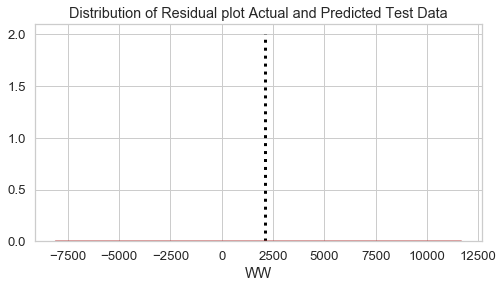

In [335]:
# Calculate the Residuals and check if they are normally distributed or not
res_test_m1 = y_test - y_test_pred
plt.figure(1,figsize=(8,4))
sns.set(style="whitegrid",font_scale=1.2)
sns.distplot(round(res_test_m1,2),bins=10,color="firebrick")
plt.vlines(round(res_test_m1,2).mean(),ymin=0,ymax=2,linewidth=3.0,color="black",linestyles='dotted')
plt.title('Distribution of Residual plot Actual and Predicted Test Data')
plt.show()

In [336]:
# Mean of Residuals
round(res_test_m1,2).mean()

2110.308

* The mean of residuals is observed to be very close 0

#### Error terms are independent of each other:

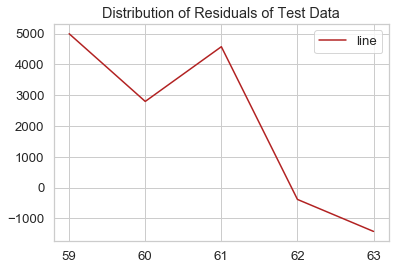

In [337]:
plt.figure(1,figsize=(6,4))
sns.set(style="whitegrid",font_scale=1.2)
ax = sns.lineplot(data=res_test_m1, color="firebrick", label="line")
plt.title('Distribution of Residuals of Test Data')
plt.show()

* There is no specific visible pattern

#### Error terms have constant variance (homoscedasticity):

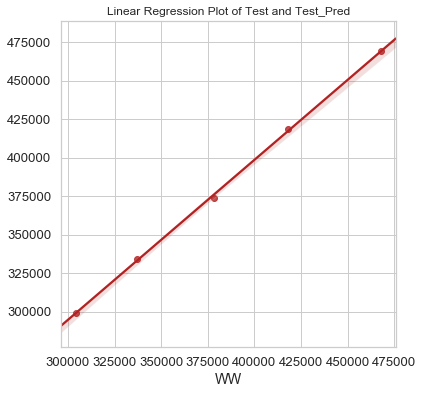

In [338]:
plt.figure(2,figsize=(6,6))
sns.set(style="whitegrid",font_scale=1.2)
ax1 = sns.regplot(x=y_test,y=y_test_pred,color="firebrick")
plt.title('Linear Regression Plot of Test and Test_Pred',fontsize=12)
plt.show()

* Error terms have constant variance but in the end couple of points are out of the variance

#### Distribution of Actual Test Data and Predicted Test Data

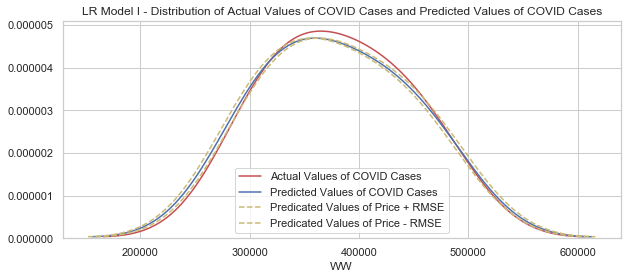

In [339]:
# Plot the distribution of Actual values of Price and Predicted values of Price
plt.figure(1,figsize=(10,4))
sns.set(style="whitegrid",font_scale=1)
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Values of COVID Cases")
sns.distplot(y_test_pred, hist=False, color="b", label="Predicted Values of COVID Cases" , ax=ax1)
sns.distplot((y_test_pred+rmse), hist=False, color="y", label="Predicated Values of Price + RMSE" , ax=ax1, kde_kws={'linestyle':'--'})
sns.distplot((y_test_pred-rmse), hist=False, color="y", label="Predicated Values of Price - RMSE" , ax=ax1, kde_kws={'linestyle':'--'})
plt.title('LR Model I - Distribution of Actual Values of COVID Cases and Predicted Values of COVID Cases',fontsize=12)
plt.show()

### Predict on Actual Test Data

In [340]:
# generate days up to 72. 
X_act_test = np.arange(1,72).reshape(-1,1)

In [341]:
# predict y_test_pred based on our model
y_act_test_pred = lm.predict(X_act_test)

In [342]:
# create a df with predicted values
covid_df = pd.DataFrame()

In [343]:
# Create a column with Dates and Day. Starting date is 2020-01-22
covid_df["Day"] = np.arange(1,72)
covid_df["Date"] =  pd.date_range(start=c_df.Date[0], end=c_df.Date[0]+pd.to_timedelta(pd.np.ceil(70), unit="D"))
covid_df[cntry_pred_m1] = np.rint(y_act_test_pred)

### Model 2 with different polynomial

In [344]:
# Build the model with optimal degree.
degree = 9
reg = Lasso(random_state=rndm_stat)
lm = make_pipeline(PolynomialFeatures(degree), reg)
lm.fit(X_train, y_train)
# predict y_test_pred based on our model
y_act_test_pred = lm.predict(X_act_test)
# add it to df
covid_df[cntry_pred_m2] = np.rint(y_act_test_pred)

In [345]:
# add the data to final df
covid_df[cntry] = c_df[cntry]

In [346]:
covid_df[["Date",cntry_pred_m1,cntry_pred_m2,cntry]].tail(10)

,Date,WW_Pred_M1,WW_Pred_M2,WW
61,2020-03-23,373662.0,381735.0,378235.0
62,2020-03-24,418431.0,430036.0,418045.0
63,2020-03-25,469018.0,485091.0,467593.0
64,2020-03-26,526021.0,547671.0,NaN
65,2020-03-27,590087.0,618614.0,NaN
66,2020-03-28,661909.0,698833.0,NaN
67,2020-03-29,742236.0,789320.0,NaN
68,2020-03-30,831868.0,891155.0,NaN
69,2020-03-31,931667.0,1005507.0,NaN
70,2020-04-01,1042556.0,1133641.0,NaN


## __Plot the Actual vs Predicted Models__

In [347]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=covid_df["Date"],y=covid_df[cntry_pred_m1],mode='lines+markers',name=cntry_pred_m1))
fig.add_trace(go.Scatter(x=covid_df["Date"],y=covid_df[cntry_pred_m2],mode='lines+markers',name=cntry_pred_m2))
fig.add_trace(go.Scatter(x=covid_df["Date"],y=c_df[cntry],mode='lines+markers',name=cntry_act))
fig.update_layout(margin=dict(l=40, r=30, t=25, b=25),) 
fig.update_xaxes(nticks=30)
fig.show()

In [348]:
covid_df[cntry] = c_df[cntry]

In [349]:
covid_df.tail(10)

,Day,Date,WW_Pred_M1,WW_Pred_M2,WW
61,62,2020-03-23,373662.0,381735.0,378235.0
62,63,2020-03-24,418431.0,430036.0,418045.0
63,64,2020-03-25,469018.0,485091.0,467593.0
64,65,2020-03-26,526021.0,547671.0,NaN
65,66,2020-03-27,590087.0,618614.0,NaN
66,67,2020-03-28,661909.0,698833.0,NaN
67,68,2020-03-29,742236.0,789320.0,NaN
68,69,2020-03-30,831868.0,891155.0,NaN
69,70,2020-03-31,931667.0,1005507.0,NaN
70,71,2020-04-01,1042556.0,1133641.0,NaN


# __LR Model using Linear Regression for - Italy__

## Explore the data for Modelling

In [350]:
# Prepare the strings to be used
cntry = "Italy"
cntry_act = cntry+"_Actuals"
cntry_pred_m1 = cntry+"_Pred_M1"
cntry_pred_m2 = cntry+"_Pred_M2"

In [351]:
# 2 Models are created and hence 2 copies of df_train and test to perform the analysis
y_train = df_train[cntry].copy(deep=True)
X_train = df_train[["Day"]].copy(deep=True)

y_test = df_test[cntry].copy(deep=True)
X_test = df_test[["Day"]].copy(deep=True)

## Build the LR Model on Training Set

### Parameter Tuning and Selection of Degree

In [352]:
# Populate the results for different degrees
deg = 8
eval_reg(X_train,y_train,deg)

,Degree,RSquare,MAE,MSE,RMSE
0,2.0,0.850160,3500.180928,1.819419e+07,4265.464592
1,3.0,0.974794,1395.082390,3.060618e+06,1749.462321
2,4.0,0.987264,1012.839394,1.546501e+06,1243.584041
3,5.0,0.994203,663.057653,7.038479e+05,838.956428
4,6.0,0.997442,409.334840,3.105519e+05,557.271803
5,7.0,0.998452,269.764266,1.879617e+05,433.545466


### Build the Model using the selected degree

In [353]:
# Build the model with optimal degree.
degree = 4

reg = Lasso(random_state=rndm_stat)
# create an instance using the optimal degree
lm = make_pipeline(PolynomialFeatures(degree), reg)

# fit the model using training data
lm.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=42, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

## Predictions on the train set and evaluate the metrics

In [354]:
y_train_pred = lm.predict(X_train)

## Prediction and Evaluation on the Test Set

* Make predictions on the test set (y_test_pred)
* evaluate the model, r-squared on the test set

### Predict on Test Data

In [355]:
# predict y_test_pred based on our model
y_test_pred = lm.predict(X_test)

In [356]:
y_test_pred

array([48476.49208826, 53493.85342235, 58849.56789384, 64556.78938655,
       70628.8862178 ])

### Model Evalution of Metrics of Test Data

In [357]:
# calculate the RSquared and RMSE for test data and Predicted data
print(color.BOLD+"\nModel Evalutation metrics of test set with degree ",degree)
rsqr,mar,mse,rmse = lm_metrics(y_test,y_test_pred)

print(color.BOLD+"RSquare of the Model is ",round(rsqr,2))
print(color.BOLD+"Mean Absolute Error of the Model is",round(mar,2))
print(color.BOLD+"MSE of the model is ",round(mse,2))
print(color.BOLD+"RMSE of the model is ",round(rmse,2))


Model Evalutation metrics of test set with degree  4
RSquare of the Model is  0.55
Mean Absolute Error of the Model is 4839.88
MSE of the model is  23823020.2
RMSE of the model is  4880.88


#### Distribution of Actual Test Data and Predicted Test Data

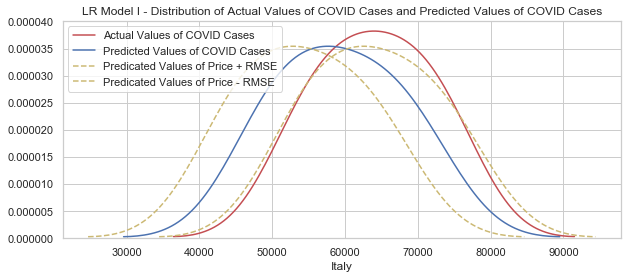

In [358]:
# Plot the distribution of Actual values of Price and Predicted values of Price
plt.figure(1,figsize=(10,4))
sns.set(style="whitegrid",font_scale=1)
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Values of COVID Cases")
sns.distplot(y_test_pred, hist=False, color="b", label="Predicted Values of COVID Cases" , ax=ax1)
sns.distplot((y_test_pred+rmse), hist=False, color="y", label="Predicated Values of Price + RMSE" , ax=ax1, kde_kws={'linestyle':'--'})
sns.distplot((y_test_pred-rmse), hist=False, color="y", label="Predicated Values of Price - RMSE" , ax=ax1, kde_kws={'linestyle':'--'})
plt.title('LR Model I - Distribution of Actual Values of COVID Cases and Predicted Values of COVID Cases',fontsize=12)
plt.show()

### Predict on Actual Test Data

In [359]:
# predict y_test_pred based on our model
y_act_test_pred = lm.predict(X_act_test)

In [360]:
# Create a column with Dates and Day. Starting date is 2020-01-22
covid_df[cntry_pred_m1] = np.rint(y_act_test_pred)

### Model 2 with different polynomial

In [361]:
# Build the model with optimal degree.
degree = 5
reg = Lasso(random_state=rndm_stat)
lm = make_pipeline(PolynomialFeatures(degree), reg)
lm.fit(X_train, y_train)
# predict y_test_pred based on our model
y_act_test_pred = lm.predict(X_act_test)
# add it to df
covid_df[cntry_pred_m2] = np.rint(y_act_test_pred)

In [362]:
# add the data to final df
covid_df[cntry] = c_df[cntry]

In [363]:
covid_df[["Date","WW_Pred_M1",cntry_pred_m1,cntry_pred_m2]].tail(10)

,Date,WW_Pred_M1,Italy_Pred_M1,Italy_Pred_M2
61,2020-03-23,373662.0,58850.0,62531.0
62,2020-03-24,418431.0,64557.0,69244.0
63,2020-03-25,469018.0,70629.0,76469.0
64,2020-03-26,526021.0,77079.0,84232.0
65,2020-03-27,590087.0,83922.0,92562.0
66,2020-03-28,661909.0,91171.0,101486.0
67,2020-03-29,742236.0,98841.0,111032.0
68,2020-03-30,831868.0,106945.0,121230.0
69,2020-03-31,931667.0,115499.0,132111.0
70,2020-04-01,1042556.0,124518.0,143707.0


## __Plot the Actual vs Predicted Models__

In [364]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=covid_df["Date"],y=covid_df[cntry_pred_m1],mode='lines+markers',name=cntry_pred_m1))
fig.add_trace(go.Scatter(x=covid_df["Date"],y=covid_df[cntry_pred_m2],mode='lines+markers',name=cntry_pred_m2))
fig.add_trace(go.Scatter(x=covid_df["Date"],y=c_df[cntry],mode='lines+markers',name=cntry_act))
fig.update_layout(margin=dict(l=40, r=30, t=25, b=25),) 
fig.update_xaxes(nticks=30)
fig.show()

# __LR Model using Linear Regression for US__

## Explore the data for Modelling

In [365]:
# Prepare the strings to be used
cntry = "US"
cntry_act = cntry+"_Actuals"
cntry_pred_m1 = cntry+"_Pred_M1"
cntry_pred_m2 = cntry+"_Pred_M2"

In [366]:
# 2 Models are created and hence 2 copies of df_train and test to perform the analysis
y_train = df_train[cntry].copy(deep=True)
X_train = df_train[["Day"]].copy(deep=True)

y_test = df_test[cntry].copy(deep=True)
X_test = df_test[["Day"]].copy(deep=True)

## Build the LR Model on Training Set

### Parameter Tuning and Selection of Degree

In [367]:
# Populate the results for different degrees
deg = 20
eval_reg(X_train,y_train,deg)

,Degree,RSquare,MAE,MSE,RMSE
0,2.0,0.573791,1379.555757,4.549271e+06,2132.902007
1,3.0,0.781520,1000.758213,2.332016e+06,1527.094034
2,4.0,0.826899,957.825495,1.847644e+06,1359.280778
3,5.0,0.872538,815.797832,1.360500e+06,1166.404863
4,6.0,0.911565,646.731103,9.439377e+05,971.564577
5,7.0,0.937552,519.398477,6.665635e+05,816.433422
6,8.0,0.952525,463.942774,5.067392e+05,711.856136
7,9.0,0.961469,436.868789,4.112684e+05,641.302092
8,10.0,0.967872,410.583977,3.429318e+05,585.603826
9,11.0,0.973169,377.329349,2.863925e+05,535.156518


### Build the Model using the selected degree

In [368]:
# Build the model with optimal degree.
degree = 14

reg = Lasso(random_state=rndm_stat)
# create an instance using the optimal degree
lm = make_pipeline(PolynomialFeatures(degree), reg)

# fit the model using training data
lm.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=14, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=42, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

## Predictions on the train set and evaluate the metrics

In [369]:
y_train_pred = lm.predict(X_train)

## Prediction and Evaluation on the Test Set

* Make predictions on the test set (y_test_pred)
* evaluate the model, r-squared on the test set

### Predict on Test Data

In [370]:
# predict y_test_pred based on our model
y_test_pred = lm.predict(X_test)

In [371]:
y_test_pred

array([23869.73726323, 31354.51878285, 40787.86780031, 52596.11054711,
       67285.82512432])

### Model Evalution of Metrics of Test Data

In [372]:
# calculate the RSquared and RMSE for test data and Predicted data
print(color.BOLD+"\nModel Evalutation metrics of test set with degree ",degree)
rsqr,mar,mse,rmse = lm_metrics(y_test,y_test_pred)

print(color.BOLD+"RSquare of the Model is ",round(rsqr,2))
print(color.BOLD+"Mean Absolute Error of the Model is",round(mar,2))
print(color.BOLD+"MSE of the model is ",round(mse,2))
print(color.BOLD+"RMSE of the model is ",round(rmse,2))


Model Evalutation metrics of test set with degree  14
RSquare of the Model is  0.98
Mean Absolute Error of the Model is 1850.32
MSE of the model is  3850882.28
RMSE of the model is  1962.37


#### Distribution of Actual Test Data and Predicted Test Data

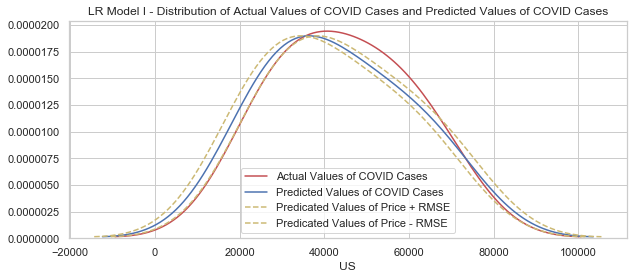

In [373]:
# Plot the distribution of Actual values of Price and Predicted values of Price
plt.figure(1,figsize=(10,4))
sns.set(style="whitegrid",font_scale=1)
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Values of COVID Cases")
sns.distplot(y_test_pred, hist=False, color="b", label="Predicted Values of COVID Cases" , ax=ax1)
sns.distplot((y_test_pred+rmse), hist=False, color="y", label="Predicated Values of Price + RMSE" , ax=ax1, kde_kws={'linestyle':'--'})
sns.distplot((y_test_pred-rmse), hist=False, color="y", label="Predicated Values of Price - RMSE" , ax=ax1, kde_kws={'linestyle':'--'})
plt.title('LR Model I - Distribution of Actual Values of COVID Cases and Predicted Values of COVID Cases',fontsize=12)
plt.show()

### Predict on Actual Test Data

In [374]:
# predict y_test_pred based on our model
y_act_test_pred = lm.predict(X_act_test)

In [375]:
# Create a column with Dates and Day. Starting date is 2020-01-22
covid_df[cntry_pred_m1] = np.rint(y_act_test_pred)

### Model 2 with different polynomial

In [376]:
# Build the model with optimal degree.
degree = 13
reg = Lasso(random_state=rndm_stat)
lm = make_pipeline(PolynomialFeatures(degree), reg)
lm.fit(X_train, y_train)
# predict y_test_pred based on our model
y_act_test_pred = lm.predict(X_act_test)
# add it to df
covid_df[cntry_pred_m2] = np.rint(y_act_test_pred)

In [377]:
# add the data to final df
covid_df[cntry] = c_df[cntry]

In [378]:
covid_df[["Date","WW_Pred_M1",cntry_pred_m1,cntry_pred_m2]].tail(10)

,Date,WW_Pred_M1,US_Pred_M1,US_Pred_M2
61,2020-03-23,373662.0,40788.0,38964.0
62,2020-03-24,418431.0,52596.0,49660.0
63,2020-03-25,469018.0,67286.0,62788.0
64,2020-03-26,526021.0,85457.0,78816.0
65,2020-03-27,590087.0,107818.0,98285.0
66,2020-03-28,661909.0,135204.0,121825.0
67,2020-03-29,742236.0,168594.0,150164.0
68,2020-03-30,831868.0,209135.0,184145.0
69,2020-03-31,931667.0,258169.0,224738.0
70,2020-04-01,1042556.0,317258.0,273061.0


## __Plot the Actual vs Predicted Models__

In [379]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=covid_df["Date"],y=covid_df[cntry_pred_m1],mode='lines+markers',name=cntry_pred_m1))
fig.add_trace(go.Scatter(x=covid_df["Date"],y=covid_df[cntry_pred_m2],mode='lines+markers',name=cntry_pred_m2))
fig.add_trace(go.Scatter(x=covid_df["Date"],y=c_df[cntry],mode='lines+markers',name=cntry_act))
fig.update_layout(margin=dict(l=40, r=30, t=25, b=25),) 
fig.update_xaxes(nticks=30)
fig.show()

# __LR Model using Linear Regression for - Spain__

## Explore the data for Modelling

In [380]:
# Prepare the strings to be used
cntry = "Spain"
cntry_act = cntry+"_Actuals"
cntry_pred_m1 = cntry+"_Pred_M1"
cntry_pred_m2 = cntry+"_Pred_M2"

In [381]:
# 2 Models are created and hence 2 copies of df_train and test to perform the analysis
y_train = df_train[cntry].copy(deep=True)
X_train = df_train[["Day"]].copy(deep=True)

y_test = df_test[cntry].copy(deep=True)
X_test = df_test[["Day"]].copy(deep=True)

## Build the LR Model on Training Set

### Parameter Tuning and Selection of Degree

In [382]:
# Populate the results for different degrees
deg = 20
eval_reg(X_train,y_train,deg)

,Degree,RSquare,MAE,MSE,RMSE
0,2.0,0.709489,1797.359617,5.579838e+06,2362.168052
1,3.0,0.908180,1022.485696,1.763577e+06,1327.997315
2,4.0,0.940559,876.812724,1.141687e+06,1068.497338
3,5.0,0.966306,665.985394,6.471576e+05,804.461079
4,6.0,0.983477,459.411161,3.173472e+05,563.335802
5,7.0,0.991903,302.034081,1.555120e+05,394.350072
6,8.0,0.995034,220.157731,9.538477e+04,308.844254
7,9.0,0.995927,189.709453,7.823552e+04,279.706126
8,10.0,0.996063,175.654086,7.561488e+04,274.981601
9,11.0,0.995973,171.098164,7.734082e+04,278.102174


### Build the Model using the selected degree

In [383]:
# Build the model with optimal degree.
degree = 16

reg = Lasso(random_state=rndm_stat)
# create an instance using the optimal degree
lm = make_pipeline(PolynomialFeatures(degree), reg)

# fit the model using training data
lm.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=16, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=42, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

## Predictions on the train set and evaluate the metrics

In [384]:
y_train_pred = lm.predict(X_train)

## Prediction and Evaluation on the Test Set

* Make predictions on the test set (y_test_pred)
* evaluate the model, r-squared on the test set

### Predict on Test Data

In [385]:
# predict y_test_pred based on our model
y_test_pred = lm.predict(X_test)

In [386]:
y_test_pred

array([25048.52293623, 29840.91015455, 35352.07946089, 41660.87967284,
       48849.84178613])

### Model Evalution of Metrics of Test Data

In [387]:
# calculate the RSquared and RMSE for test data and Predicted data
print(color.BOLD+"\nModel Evalutation metrics of test set with degree ",degree)
rsqr,mar,mse,rmse = lm_metrics(y_test,y_test_pred)

print(color.BOLD+"RSquare of the Model is ",round(rsqr,2))
print(color.BOLD+"Mean Absolute Error of the Model is",round(mar,2))
print(color.BOLD+"MSE of the model is ",round(mse,2))
print(color.BOLD+"RMSE of the model is ",round(rmse,2))


Model Evalutation metrics of test set with degree  16
RSquare of the Model is  0.99
Mean Absolute Error of the Model is 811.1
MSE of the model is  979989.18
RMSE of the model is  989.94


#### Distribution of Actual Test Data and Predicted Test Data

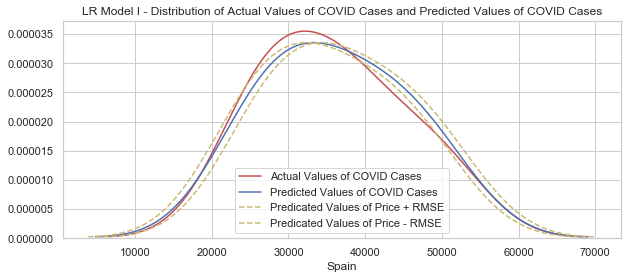

In [388]:
# Plot the distribution of Actual values of Price and Predicted values of Price
plt.figure(1,figsize=(10,4))
sns.set(style="whitegrid",font_scale=1)
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Values of COVID Cases")
sns.distplot(y_test_pred, hist=False, color="b", label="Predicted Values of COVID Cases" , ax=ax1)
sns.distplot((y_test_pred+rmse), hist=False, color="y", label="Predicated Values of Price + RMSE" , ax=ax1, kde_kws={'linestyle':'--'})
sns.distplot((y_test_pred-rmse), hist=False, color="y", label="Predicated Values of Price - RMSE" , ax=ax1, kde_kws={'linestyle':'--'})
plt.title('LR Model I - Distribution of Actual Values of COVID Cases and Predicted Values of COVID Cases',fontsize=12)
plt.show()

### Predict on Actual Test Data

In [389]:
# predict y_test_pred based on our model
y_act_test_pred = lm.predict(X_act_test)

In [390]:
# Create a column with Dates and Day. Starting date is 2020-01-22
covid_df[cntry_pred_m1] = np.rint(y_act_test_pred)

### Model 2 with different polynomial

In [391]:
# Build the model with optimal degree.
degree = 15
reg = Lasso(random_state=rndm_stat)
lm = make_pipeline(PolynomialFeatures(degree), reg)
lm.fit(X_train, y_train)
# predict y_test_pred based on our model
y_act_test_pred = lm.predict(X_act_test)
# add it to df
covid_df[cntry_pred_m2] = np.rint(y_act_test_pred)

In [392]:
# add the data to final df
covid_df[cntry] = c_df[cntry]

In [393]:
covid_df[["Date","WW_Pred_M1",cntry_pred_m1,cntry_pred_m2]].tail(10)

,Date,WW_Pred_M1,Spain_Pred_M1,Spain_Pred_M2
61,2020-03-23,373662.0,35352.0,35823.0
62,2020-03-24,418431.0,41661.0,42433.0
63,2020-03-25,469018.0,48850.0,50052.0
64,2020-03-26,526021.0,57004.0,58811.0
65,2020-03-27,590087.0,66210.0,68849.0
66,2020-03-28,661909.0,76554.0,80323.0
67,2020-03-29,742236.0,88119.0,93402.0
68,2020-03-30,831868.0,100981.0,108273.0
69,2020-03-31,931667.0,115206.0,125137.0
70,2020-04-01,1042556.0,130848.0,144215.0


## __Plot the Actual vs Predicted Models__

In [394]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=covid_df["Date"],y=covid_df[cntry_pred_m1],mode='lines+markers',name=cntry_pred_m1))
fig.add_trace(go.Scatter(x=covid_df["Date"],y=covid_df[cntry_pred_m2],mode='lines+markers',name=cntry_pred_m2))
fig.add_trace(go.Scatter(x=covid_df["Date"],y=c_df[cntry],mode='lines+markers',name=cntry_act))
fig.update_layout(margin=dict(l=40, r=30, t=25, b=25),) 
fig.update_xaxes(nticks=30)
fig.show()

# __LR Model using Linear Regression for Germany__

## Explore the data for Modelling

In [395]:
# Prepare the strings to be used
cntry = "Germany"
cntry_act = cntry+"_Actuals"
cntry_pred_m1 = cntry+"_Pred_M1"
cntry_pred_m2 = cntry+"_Pred_M2"

In [396]:
# 2 Models are created and hence 2 copies of df_train and test to perform the analysis
y_train = df_train[cntry].copy(deep=True)
X_train = df_train[["Day"]].copy(deep=True)

y_test = df_test[cntry].copy(deep=True)
X_test = df_test[["Day"]].copy(deep=True)

## Build the LR Model on Training Set

### Parameter Tuning and Selection of Degree

In [397]:
# Populate the results for different degrees
deg = 9
eval_reg(X_train,y_train,deg)

,Degree,RSquare,MAE,MSE,RMSE
0,2.0,0.678183,1575.224635,4.729170e+06,2174.665556
1,3.0,0.877497,973.714341,1.800208e+06,1341.718415
2,4.0,0.913713,877.551024,1.268006e+06,1126.057777
3,5.0,0.945655,699.945756,7.986047e+05,893.646867
4,6.0,0.969774,512.520719,4.441810e+05,666.469086
5,7.0,0.983799,361.991825,2.380761e+05,487.930464
6,8.0,0.990652,272.685925,1.373649e+05,370.627674


### Build the Model using the selected degree

In [398]:
# Build the model with optimal degree.
degree = 7

reg = Lasso(random_state=rndm_stat)
# create an instance using the optimal degree
lm = make_pipeline(PolynomialFeatures(degree), reg)

# fit the model using training data
lm.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=7, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=42, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

## Predictions on the train set and evaluate the metrics

In [399]:
y_train_pred = lm.predict(X_train)

## Prediction and Evaluation on the Test Set

* Make predictions on the test set (y_test_pred)
* evaluate the model, r-squared on the test set

### Predict on Test Data

In [400]:
# predict y_test_pred based on our model
y_test_pred = lm.predict(X_test)

In [401]:
y_test_pred

array([21153.17881216, 24877.75466758, 29081.68475871, 33810.0899071 ,
       39111.16524577])

### Model Evalution of Metrics of Test Data

In [402]:
# calculate the RSquared and RMSE for test data and Predicted data
print(color.BOLD+"\nModel Evalutation metrics of test set with degree ",degree)
rsqr,mar,mse,rmse = lm_metrics(y_test,y_test_pred)

print(color.BOLD+"RSquare of the Model is ",round(rsqr,2))
print(color.BOLD+"Mean Absolute Error of the Model is",round(mar,2))
print(color.BOLD+"MSE of the model is ",round(mse,2))
print(color.BOLD+"RMSE of the model is ",round(rmse,2))


Model Evalutation metrics of test set with degree  7
RSquare of the Model is  0.97
Mean Absolute Error of the Model is 740.5
MSE of the model is  1000112.48
RMSE of the model is  1000.06


#### Distribution of Actual Test Data and Predicted Test Data

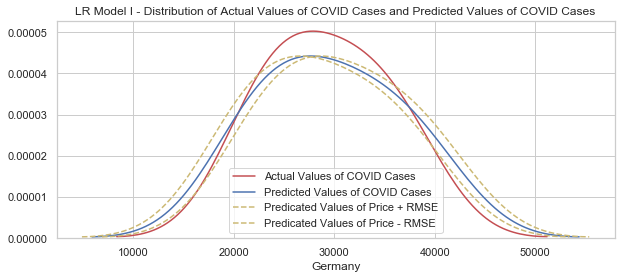

In [403]:
# Plot the distribution of Actual values of Price and Predicted values of Price
plt.figure(1,figsize=(10,4))
sns.set(style="whitegrid",font_scale=1)
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Values of COVID Cases")
sns.distplot(y_test_pred, hist=False, color="b", label="Predicted Values of COVID Cases" , ax=ax1)
sns.distplot((y_test_pred+rmse), hist=False, color="y", label="Predicated Values of Price + RMSE" , ax=ax1, kde_kws={'linestyle':'--'})
sns.distplot((y_test_pred-rmse), hist=False, color="y", label="Predicated Values of Price - RMSE" , ax=ax1, kde_kws={'linestyle':'--'})
plt.title('LR Model I - Distribution of Actual Values of COVID Cases and Predicted Values of COVID Cases',fontsize=12)
plt.show()

### Predict on Actual Test Data

In [404]:
# predict y_test_pred based on our model
y_act_test_pred = lm.predict(X_act_test)

In [405]:
# Create a column with Dates and Day. Starting date is 2020-01-22
covid_df[cntry_pred_m1] = np.rint(y_act_test_pred)

### Model 2 with different polynomial

In [406]:
# Build the model with optimal degree.
degree = 6
reg = Lasso(random_state=rndm_stat)
lm = make_pipeline(PolynomialFeatures(degree), reg)
lm.fit(X_train, y_train)
# predict y_test_pred based on our model
y_act_test_pred = lm.predict(X_act_test)
# add it to df
covid_df[cntry_pred_m2] = np.rint(y_act_test_pred)

In [407]:
# add the data to final df
covid_df[cntry] = c_df[cntry]

In [408]:
covid_df[["Date","WW_Pred_M1",cntry_pred_m1,cntry_pred_m2]].tail(10)

,Date,WW_Pred_M1,Germany_Pred_M1,Germany_Pred_M2
61,2020-03-23,373662.0,29082.0,26622.0
62,2020-03-24,418431.0,33810.0,30504.0
63,2020-03-25,469018.0,39111.0,34790.0
64,2020-03-26,526021.0,45036.0,39510.0
65,2020-03-27,590087.0,51640.0,44697.0
66,2020-03-28,661909.0,58982.0,50381.0
67,2020-03-29,742236.0,67122.0,56599.0
68,2020-03-30,831868.0,76127.0,63385.0
69,2020-03-31,931667.0,86068.0,70777.0
70,2020-04-01,1042556.0,97017.0,78816.0


## __Plot the Actual vs Predicted Models__

In [409]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=covid_df["Date"],y=covid_df[cntry_pred_m1],mode='lines+markers',name=cntry_pred_m1))
fig.add_trace(go.Scatter(x=covid_df["Date"],y=covid_df[cntry_pred_m2],mode='lines+markers',name=cntry_pred_m2))
fig.add_trace(go.Scatter(x=covid_df["Date"],y=c_df[cntry],mode='lines+markers',name=cntry_act))
fig.update_layout(margin=dict(l=40, r=30, t=25, b=25),) 
fig.update_xaxes(nticks=30)
fig.show()

# __LR Model using Linear Regression for India__

## Explore the data for Modelling

In [410]:
# Prepare the strings to be used
cntry = "India"
cntry_act = cntry+"_Actuals"
cntry_pred_m1 = cntry+"_Pred_M1"
cntry_pred_m2 = cntry+"_Pred_M2"

In [411]:
# 2 Models are created and hence 2 copies of df_train and test to perform the analysis
y_train = df_train[cntry].copy(deep=True)
X_train = df_train[["Day"]].copy(deep=True)

y_test = df_test[cntry].copy(deep=True)
X_test = df_test[["Day"]].copy(deep=True)

## Build the LR Model on Training Set

### Parameter Tuning and Selection of Degree

In [412]:
# Populate the results for different degrees
deg = 25
eval_reg(X_train,y_train,deg)

,Degree,RSquare,MAE,MSE,RMSE
0,2.0,0.838288,16.297510,437.287751,20.911426
1,3.0,0.966321,6.962430,91.070590,9.543091
2,4.0,0.979947,5.416804,54.225760,7.363814
3,5.0,0.987032,3.918373,35.068099,5.921832
4,6.0,0.990308,2.922511,26.207922,5.119367
5,7.0,0.991399,2.531356,23.257193,4.822571
6,8.0,0.991699,2.735597,22.446931,4.737819
7,9.0,0.991826,2.934876,22.104297,4.701521
8,10.0,0.991947,3.050694,21.777015,4.666585
9,11.0,0.992096,3.107790,21.372166,4.623004


### Build the Model using the selected degree

In [413]:
# Build the model with optimal degree.
degree = 20

reg = Lasso(random_state=rndm_stat)
# create an instance using the optimal degree
lm = make_pipeline(PolynomialFeatures(degree), reg)

# fit the model using training data
lm.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=42, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

## Predictions on the train set and evaluate the metrics

In [414]:
y_train_pred = lm.predict(X_train)

## Prediction and Evaluation on the Test Set

* Make predictions on the test set (y_test_pred)
* evaluate the model, r-squared on the test set

### Predict on Test Data

In [415]:
# predict y_test_pred based on our model
y_test_pred = lm.predict(X_test)

In [416]:
y_test_pred

array([287.26635235, 352.7384442 , 438.51969413, 551.43640119,
       700.46265496])

### Model Evalution of Metrics of Test Data

In [417]:
# calculate the RSquared and RMSE for test data and Predicted data
print(color.BOLD+"\nModel Evalutation metrics of test set with degree ",degree)
rsqr,mar,mse,rmse = lm_metrics(y_test,y_test_pred)

print(color.BOLD+"RSquare of the Model is ",round(rsqr,2))
print(color.BOLD+"Mean Absolute Error of the Model is",round(mar,2))
print(color.BOLD+"MSE of the model is ",round(mse,2))
print(color.BOLD+"RMSE of the model is ",round(rmse,2))


Model Evalutation metrics of test set with degree  20
RSquare of the Model is  0.85
Mean Absolute Error of the Model is 41.07
MSE of the model is  1896.58
RMSE of the model is  43.55


#### Distribution of Actual Test Data and Predicted Test Data

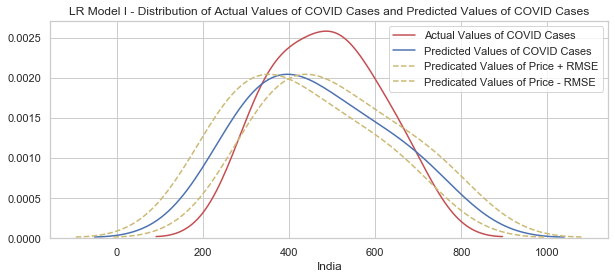

In [418]:
# Plot the distribution of Actual values of Price and Predicted values of Price
plt.figure(1,figsize=(10,4))
sns.set(style="whitegrid",font_scale=1)
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Values of COVID Cases")
sns.distplot(y_test_pred, hist=False, color="b", label="Predicted Values of COVID Cases" , ax=ax1)
sns.distplot((y_test_pred+rmse), hist=False, color="y", label="Predicated Values of Price + RMSE" , ax=ax1, kde_kws={'linestyle':'--'})
sns.distplot((y_test_pred-rmse), hist=False, color="y", label="Predicated Values of Price - RMSE" , ax=ax1, kde_kws={'linestyle':'--'})
plt.title('LR Model I - Distribution of Actual Values of COVID Cases and Predicted Values of COVID Cases',fontsize=12)
plt.show()

### Predict on Actual Test Data

In [419]:
# predict y_test_pred based on our model
y_act_test_pred = lm.predict(X_act_test)

In [420]:
# Create a column with Dates and Day. Starting date is 2020-01-22
covid_df[cntry_pred_m1] = np.rint(y_act_test_pred)

### Model 2 with different polynomial

In [421]:
# Build the model with optimal degree.
degree = 19
reg = Lasso(random_state=rndm_stat)
lm = make_pipeline(PolynomialFeatures(degree), reg)
lm.fit(X_train, y_train)
# predict y_test_pred based on our model
y_act_test_pred = lm.predict(X_act_test)
# add it to df
covid_df[cntry_pred_m2] = np.rint(y_act_test_pred)

In [422]:
# add the data to final df
covid_df[cntry] = c_df[cntry]

In [423]:
covid_df[["Date","WW_Pred_M1",cntry_pred_m1,cntry_pred_m2]].tail(10)

,Date,WW_Pred_M1,India_Pred_M1,India_Pred_M2
61,2020-03-23,373662.0,439.0,425.0
62,2020-03-24,418431.0,551.0,527.0
63,2020-03-25,469018.0,700.0,659.0
64,2020-03-26,526021.0,897.0,831.0
65,2020-03-27,590087.0,1157.0,1053.0
66,2020-03-28,661909.0,1500.0,1341.0
67,2020-03-29,742236.0,1951.0,1713.0
68,2020-03-30,831868.0,2544.0,2193.0
69,2020-03-31,931667.0,3319.0,2811.0
70,2020-04-01,1042556.0,4330.0,3605.0


## __Plot the Actual vs Predicted Models__

In [424]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=covid_df["Date"],y=covid_df[cntry_pred_m1],mode='lines+markers',name=cntry_pred_m1))
fig.add_trace(go.Scatter(x=covid_df["Date"],y=covid_df[cntry_pred_m2],mode='lines+markers',name=cntry_pred_m2))
fig.add_trace(go.Scatter(x=covid_df["Date"],y=c_df[cntry],mode='lines+markers',name=cntry_act))
fig.update_layout(margin=dict(l=40, r=30, t=25, b=25),) 
fig.update_xaxes(nticks=30)
fig.show()

In [425]:
covid_df.tail(20)

,Day,Date,WW_Pred_M1,WW_Pred_M2,WW,Italy_Pred_M1,Italy_Pred_M2,Italy,US_Pred_M1,US_Pred_M2,US,Spain_Pred_M1,Spain_Pred_M2,Spain,Germany_Pred_M1,Germany_Pred_M2,Germany,India_Pred_M1,India_Pred_M2,India
61,62,2020-03-23,373662.0,381735.0,378235.0,58850.0,62531.0,63927.0,40788.0,38964.0,43847.0,35352.0,35823.0,35136.0,29082.0,26622.0,29056.0,439.0,425.0,499.0
62,63,2020-03-24,418431.0,430036.0,418045.0,64557.0,69244.0,69176.0,52596.0,49660.0,53740.0,41661.0,42433.0,39885.0,33810.0,30504.0,32986.0,551.0,527.0,536.0
63,64,2020-03-25,469018.0,485091.0,467593.0,70629.0,76469.0,74386.0,67286.0,62788.0,65778.0,48850.0,50052.0,49515.0,39111.0,34790.0,37323.0,700.0,659.0,657.0
64,65,2020-03-26,526021.0,547671.0,NaN,77079.0,84232.0,NaN,85457.0,78816.0,NaN,57004.0,58811.0,NaN,45036.0,39510.0,NaN,897.0,831.0,NaN
65,66,2020-03-27,590087.0,618614.0,NaN,83922.0,92562.0,NaN,107818.0,98285.0,NaN,66210.0,68849.0,NaN,51640.0,44697.0,NaN,1157.0,1053.0,NaN
66,67,2020-03-28,661909.0,698833.0,NaN,91171.0,101486.0,NaN,135204.0,121825.0,NaN,76554.0,80323.0,NaN,58982.0,50381.0,NaN,1500.0,1341.0,NaN
67,68,2020-03-29,742236.0,789320.0,NaN,98841.0,111032.0,NaN,168594.0,150164.0,NaN,88119.0,93402.0,NaN,67122.0,56599.0,NaN,1951.0,1713.0,NaN
68,69,2020-03-30,831868.0,891155.0,NaN,106945.0,121230.0,NaN,209135.0,184145.0,NaN,100981.0,108273.0,NaN,76127.0,63385.0,NaN,2544.0,2193.0,NaN
69,70,2020-03-31,931667.0,1005507.0,NaN,115499.0,132111.0,NaN,258169.0,224738.0,NaN,115206.0,125137.0,NaN,86068.0,70777.0,NaN,3319.0,2811.0,NaN
70,71,2020-04-01,1042556.0,1133641.0,NaN,124518.0,143707.0,NaN,317258.0,273061.0,NaN,130848.0,144215.0,NaN,97017.0,78816.0,NaN,4330.0,3605.0,NaN


In [439]:
from datetime import date
today = date.today()
fp = r"C:\My Folders\OneDrive\Surface\Sadguru\Lakshmi\Study\IIIB_PGDS\Hackathon\COVID_19" + '/' + today.strftime("%b_%d_%Y") + ".csv"
fp


'C:\\My Folders\\OneDrive\\Surface\\Sadguru\\Lakshmi\\Study\\IIIB_PGDS\\Hackathon\\COVID_19/Mar_27_2020.csv'

In [440]:
covid_df.to_csv(fp,index=False)